# Juega con los parámetros

Hay varios parámetros que están configurados de forma predeterminada cuando usas estos clasificadores. Intellisense en VS Code puede ayudarte a profundizar en ellos. Adopta una de las técnicas de clasificación de aprendizaje automático de esta lección y vuelve a entrenar los modelos ajustando varios valores de parámetros. Construye un notebook explicando por qué algunos cambios mejoran la calidad del modelo mientras otros la degradan. Sé minucioso en tu respuesta.

## Tecnica de clasificacion: K-Neighbors
Se utilizara la técnica de clasificación K-Neighbors para etiquetar los datos de accidentes automovilísticos como el tipo de lesión, pero antes necesitamos preparar los datos y luego aplicar el algoritmo K-Neighbors. 

In [43]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

1. Cargar los datos desde un DataFrame

In [44]:
df = pd.read_excel('../data/new_dataset.xlsx')
df

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625
...,...,...,...,...,...,...,...,...,...,...,...
53938,2003,10,6,Weekday,1700.0,2-Car,No injury/unknown,IMPROPER LANE USAGE,DUNN & WHITE LOT WEST,0.000000,0.000000
53939,2003,11,3,Weekday,800.0,1-Car,No injury/unknown,UNSAFE SPEED,RED OAK & SR446,0.000000,0.000000
53940,2003,12,5,Weekday,1200.0,2-Car,No injury/unknown,BRAKE FAILURE OR DEFECTIVE,2ND ST & WALNUT,0.000000,0.000000
53941,2003,12,1,Weekend,700.0,2-Car,No injury/unknown,UNSAFE BACKING,NINETH & NORTH,0.000000,0.000000


2. Vamos a seleccionar las características (features) para enlistar los datos y en la etiqueta (label) colocaremos el tipo de lesión que es la variable a predecir 

In [45]:
features = ['Year', 'Month', 'Day', 'Weekend?','Hour', 'Collision Type', 'Primary Factor', 'Reported_Location', 'Latitude', 'Longitude']
label = 'Injury Type'

X = df[features]
y = df[label]

3. Ahora codificamos las variables categóricas si es necesario

In [46]:
label_encoder = LabelEncoder()
for column in X.columns:
    if X[column].dtype == 'object':
        X[column] = X[column].astype(str)  # Convertir a tipo str
        X[column] = label_encoder.fit_transform(X[column])


C:\Users\HP\AppData\Local\Temp\ipykernel_29588\1974019801.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].astype(str)  # Convertir a tipo str
C:\Users\HP\AppData\Local\Temp\ipykernel_29588\1974019801.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
C:\Users\HP\AppData\Local\Temp\ipykernel_29588\1974019801.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

4. Dividir los datos en conjuntos de entrenamiento y prueba

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Inicializar y entrenar el clasificador K-Neighbors

In [48]:
# Inicializar el clasificador K-Neighbors
knn = KNeighborsClassifier(n_neighbors=5)

from sklearn.impute import SimpleImputer

# Crear un imputador con estrategia de imputación (por ejemplo, usando la mediana)
imputer = SimpleImputer(strategy='median')

# Entrenar el imputador en los datos de entrenamiento
imputer.fit(X_train)

# Aplicar la imputación a los conjuntos de entrenamiento y prueba
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Ahora puedes continuar con el entrenamiento del clasificador utilizando los datos imputados
knn.fit(X_train_imputed, y_train)

KNeighborsClassifier()

6. Ahora vamos a predecir las etiquetas en el conjunto de prueba

In [49]:
# Aplicar la imputación a los conjuntos de entrenamiento y prueba
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Ahora puedes realizar la predicción con el clasificador K-Neighbors
y_pred = knn.predict(X_test_imputed)

7. Por ultimo vamos calcular la precisión del modelo

In [50]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.7360274353508203


Por ultimo imprimimos una representacion visuAL de la matriz de confucion.

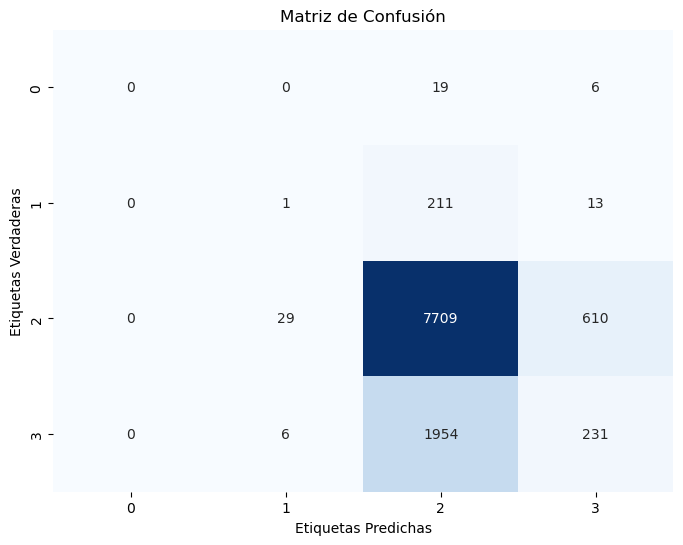

In [53]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión utilizando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.show()